# The "Perfect" Release Point: Data collection and initial exploration for relief pitchers
### By: Hadriana Lowenkron

## Step 1. Setup and importing the data and codebooks

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from IPython.display import HTML, Markdown, display
import seaborn as sns
import numpy as np
import shapely
import json
import plotly

### Load the data

In [48]:
pd.set_option('display.max_columns', None)
RP_df = pd.read_csv('../data/Original_Data_Files/relievers.csv')

In [49]:
HTML(RP_df.to_html())

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance,horizontal_release_point_ft
0,140,518617,"Diekman, Jake",1118,12.5,0,0,0,0,0,0.137,0.111,0,140,88.8,16.9,2380,91.6,88.25,55,126,14,-3.4,6.36,110,150,125,150,300,326,300,3.28
1,160,608718,"Suter, Brent",1221,13.1,0,0,0,0,0,0.127,0.122,0,159,80.5,5.6,2151,86.6,87.23,37,150,10,0.6,7.18,109,154,120,147,299,323,298,2.80
2,113,621368,"Hearn, Taylor",1726,6.5,0,0,0,0,0,0.149,0.141,0,113,85.3,17.6,2173,92.2,87.84,29,103,10,-4.4,6.19,115,154,122,147,299,324,294,2.65
3,100,592662,"Ray, Robbie",3141,3.2,0,0,0,0,0,0.105,0.098,0,99,85.7,19.9,2222,91.7,91.90,37,87,13,0.2,6.43,107,154,122,147,297,319,289,2.52
4,128,656945,"Scott, Tanner",1032,12.4,0,0,0,0,0,0.142,0.131,0,125,89.1,5.2,2649,91.4,91.45,41,112,16,0.0,6.22,109,151,121,148,300,322,293,2.49
5,154,554431,"Matzek, Tyler",1065,14.5,0,0,0,0,0,0.109,0.101,0,150,87.7,15.3,2570,92.9,92.96,49,139,15,0.1,6.34,107,151,121,148,301,320,291,1.85
6,116,606424,"García, Jarlín",1002,11.6,0,0,0,0,0,0.122,0.115,0,115,86.3,9.3,2205,88.6,84.98,28,101,15,-3.6,6.44,110,155,118,149,296,321,295,1.60
7,122,592761,"Smith, Caleb",2067,5.9,0,0,0,0,0,0.113,0.103,0,122,82.6,27.2,2348,86.9,85.06,36,109,13,-1.8,5.70,110,152,121,150,298,326,298,1.57
8,148,641394,"Brentz, Jake",1106,13.4,0,0,0,0,0,0.120,0.106,0,146,85.5,3.4,2148,92.7,93.14,41,129,19,0.4,6.42,108,158,119,144,298,322,298,1.43
9,176,650893,"Cabrera, Génesis",1195,14.7,0,0,0,0,0,0.122,0.113,0,172,84.4,13.6,2207,93.8,92.80,49,159,17,-1.0,6.03,115,154,122,148,297,316,295,1.17


## Step 2. Examining the data

* What are the dimensions (number of rows and columns)  of the data frame?
* What does each row represent? 
* What do the columns mean?

In [4]:
print("\nWe currently have three (3) pitcher category datasets (starters, relief pitchers (also known as relievers), and closers), but in this dataset I will focus on the dataset for relief pitchers.")
print(" ")
rpRows, rpColumns = RP_df.shape
print("Relief Pitchers rows: ", rpRows, " columns:", rpColumns)

print("\nEach row in a Pitcher Category Dataset represents one pitchers’ 2021 season summary stats.")
print("Each column in a Pitcher Category Dataset represents a different summary statistic for that individual pitcher.")


We currently have three (3) pitcher category datasets (starters, relief pitchers (also known as relievers), and closers), but in this dataset I will focus on the dataset for relief pitchers.
 
Relief Pitchers rows:  75  columns: 32

Each row in a Pitcher Category Dataset represents one pitchers’ 2021 season summary stats.
Each column in a Pitcher Category Dataset represents a different summary statistic for that individual pitcher.


## Step 3. Cleaning the data
* Rename columns if necessary (e.g. no spaces, reasonable length,  understandable)
* Remove unwanted rows/columns
* Clean data i.e. changing data types where necessary, adding columns etc.
* Save a copy of the cleaned dataframe to the data folder

1. Column names are appropriately named
2. Fielders positioning columns and batting-related columns are dropped
3. Absolute value of horizontal release point column is added
4. Data is in necessary types
5. Data exported to Clean_Data_Files folder

In [12]:
cleanRP_df = RP_df.drop(['ba', 'iso', 'babip','slg','woba','hits','pos3_int_start_distance', 'pos4_int_start_distance', 'pos5_int_start_distance', 'pos6_int_start_distance', 'pos7_int_start_distance','pos8_int_start_distance', 'pos9_int_start_distance'], axis = 1)
cleanRP_df['absolute_value_horizontal_release_point'] = cleanRP_df['horizontal_release_point_ft'].abs()
cleanRP_df.to_csv('../data/Clean_Data_Files/RP_df.csv')
cleanRP_df

,pitches,player_id,player_name,total_pitches,pitch_percent,xwoba,xba,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,horizontal_release_point_ft,absolute_value_horizontal_release_point
0,140,518617,"Diekman, Jake",1118,12.5,0.137,0.111,140,88.8,16.9,2380,91.6,88.25,55,126,14,-3.4,6.36,3.28,3.28
1,160,608718,"Suter, Brent",1221,13.1,0.127,0.122,159,80.5,5.6,2151,86.6,87.23,37,150,10,0.6,7.18,2.80,2.80
2,113,621368,"Hearn, Taylor",1726,6.5,0.149,0.141,113,85.3,17.6,2173,92.2,87.84,29,103,10,-4.4,6.19,2.65,2.65
3,100,592662,"Ray, Robbie",3141,3.2,0.105,0.098,99,85.7,19.9,2222,91.7,91.90,37,87,13,0.2,6.43,2.52,2.52
4,128,656945,"Scott, Tanner",1032,12.4,0.142,0.131,125,89.1,5.2,2649,91.4,91.45,41,112,16,0.0,6.22,2.49,2.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,103,571670,"Floro, Dylan",1076,9.6,0.157,0.139,103,83.4,18.9,2091,90.7,90.46,19,92,11,-0.2,6.30,-3.37,3.37
71,148,518553,"Cishek, Steve",1255,11.8,0.144,0.125,144,83.6,11.1,2355,86.5,88.29,31,132,16,1.8,7.55,-3.37,3.37
72,134,643256,"Cimber, Adam",1022,13.1,0.155,0.143,133,84.6,6.9,2259,84.6,82.32,28,130,4,-2.3,6.34,-3.67,3.67
73,127,623149,"Sewald, Paul",1104,11.5,0.090,0.076,127,83.4,24.5,2370,88.6,88.16,54,109,18,-0.4,6.46,-3.85,3.85


## Step 4. Exploring the data
* Examine the distribution (i.e., the range or type of values in the key columns of interest) 
* If relevant visualize the data (e.g. plot a histogram, plot a line graph, etc.) 
* What observations and questions do you have after exploring your data?

In [13]:
cleanRP_df.min()

pitches                                                 100
player_id                                            425794
player_name                                Alcantara, Sandy
total_pitches                                          1002
pitch_percent                                           3.2
xwoba                                                 0.082
xba                                                   0.076
abs                                                      99
launch_speed                                           79.0
launch_angle                                          -13.8
spin_rate                                              1739
velocity                                               77.1
effective_speed                                       71.66
whiffs                                                   19
swings                                                   87
takes                                                     2
eff_min_vel                             

In [14]:
cleanRP_df.max()

pitches                                               196
player_id                                          676477
player_name                                Wittgren, Nick
total_pitches                                        3205
pitch_percent                                        17.8
xwoba                                               0.183
xba                                                 0.165
abs                                                   196
launch_speed                                         89.8
launch_angle                                         28.7
spin_rate                                            2785
velocity                                             97.9
effective_speed                                     98.71
whiffs                                                 65
swings                                                189
takes                                                  20
eff_min_vel                                           1.8
release_extens

My goal with this initial data analysis assignment was to look at arm's length and determine: if a release pitcher's horizontal release point is farther out (if he's releasing it farther right), how does that impact his whiffs, which is a measure of success as it results in a strike?

Two main columns that I will be investigating are horizontal release point (ft) and average pitch velocity. These types of values are floats, and range from 77.1 to 97.9 for velocity, and 0.43 to 4.0 for the absolute value of the horizontal release point. As shown below, I graphed the two variables against each other, to show their relationship. 

[Text(0.5, 1.0, 'RP - Horizontal Release Point (ft) vs Average Pitch Velocity')]

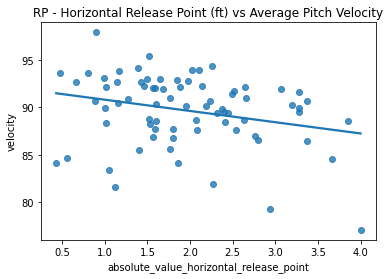

In [15]:
sns.regplot(x="absolute_value_horizontal_release_point", y="velocity", ci=None, data = cleanRP_df).set(title = 'RP - Horizontal Release Point (ft) vs Average Pitch Velocity')

As you can see, there is a semi-clear line of best fit, indicating that there is a mildly negative relationship between horizontal release point: as horizontal release point increases, velocity decreases. In regular terms, the farther out the pitch is released, the slower the ball will travel.

Two other columns that I will be investigating are horizontal release point and spin rate. Spin rates, which reflect the amount of spin that a pitched ball has on its way to home plate, are integers, and range from 1739 to 2785. As shown below, I graphed the two variables against each other, to show their relationship. 

[Text(0.5, 1.0, 'RP - Horizontal Release Point (ft) vs Spin Rate')]

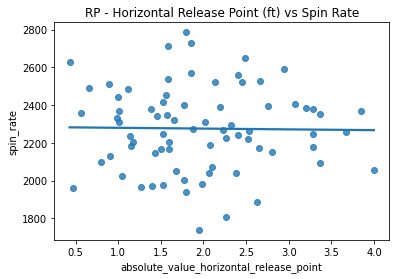

In [16]:
sns.regplot(x="absolute_value_horizontal_release_point", y="spin_rate", ci=None, data = cleanRP_df).set(title = 'RP - Horizontal Release Point (ft) vs Spin Rate')

Notably, there is not a relationship between horizontal release point and spin rate because spin rate occurs regardless of how far out the ball is pitched, so it is not a factor we will further investigate in regard to horizontal release point.

The last relationship that I will be investigating is between whiffs and horizontal release point. Whiffs are when a batter swings and misses the ball completely, which results in a strike. Whiffs are integers, and range from 19 to 65. As shown below, I graphed the two variables against each other, to show their relationship. 

[Text(0.5, 1.0, 'RP - Horizontal Release Point (ft) vs Whiffs')]

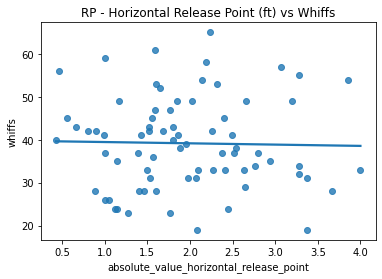

In [17]:
sns.regplot(x="absolute_value_horizontal_release_point", y="whiffs", ci=None, data = cleanRP_df).set(title = 'RP - Horizontal Release Point (ft) vs Whiffs')

Again, there isn't a steep negative relationship, showing that just because you are throwing the ball far out to the side doesn't mean the ball is any more likely to be a whiff.

In [32]:
whiffsorder = cleanRP_df.groupby('player_name')['whiffs'].mean().sort_values(ascending=False)
whiffleaders = whiffsorder.head()
whiffleaders

player_name
Mayers, Mike          65.0
Green, Chad           61.0
May, Trevor           59.0
Gallegos, Giovanny    58.0
Treinen, Blake        57.0
Name: whiffs, dtype: float64

In [33]:
whifflosers = whiffsorder.tail()
whifflosers

player_name
Wainwright, Adam    24.0
Tate, Dillon        23.0
Quantrill, Cal      23.0
Floro, Dylan        19.0
Gibson, Kyle        19.0
Name: whiffs, dtype: float64

As shown above, we have five players that lead the whiffs leaderboard, indicating that they are a good pitcher (as whiffs are one measurement of being a good pitcher), and five players that are at the bottom of the leaderboard.

In [46]:
whiffs = ['Mayers, Mike', 'Green, Chad', 'May, Trevor', 'Gallegos, Giovanny', 'Treinen, Blake','Wainwright, Adam', 'Tate, Dillon', 'Quantrill, Cal', 'Floro, Dylan', 'Gibson, Kyle']
whiffplayers = cleanRP_df['player_name'].isin(whiffs)
whiffs_df = cleanRP_df[whiffplayers]
whiffs_df

,pitches,player_id,player_name,total_pitches,pitch_percent,xwoba,xba,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,horizontal_release_point_ft,absolute_value_horizontal_release_point
20,147,543507,"May, Trevor",1117,13.2,0.082,0.078,147,87.2,20.0,2312,92.2,93.33,59,138,9,1.1,6.98,-1.01,1.01
22,142,425794,"Wainwright, Adam",3068,4.6,0.145,0.134,142,83.8,10.6,2486,81.6,81.80,24,127,15,0.2,6.49,-1.12,1.12
25,112,615698,"Quantrill, Cal",2357,4.8,0.166,0.153,109,84.2,9.8,1968,90.9,91.56,23,104,8,0.7,6.55,-1.27,1.27
34,190,643338,"Green, Chad",1312,14.5,0.137,0.120,189,87.7,28.5,2538,92.0,92.46,61,171,19,0.5,6.64,-1.59,1.59
40,143,622253,"Tate, Dillon",1042,13.7,0.162,0.145,135,84.4,-3.3,2003,91.0,90.91,23,133,10,-0.1,6.22,-1.77,1.77
49,102,502043,"Gibson, Kyle",2881,3.5,0.144,0.126,100,85.4,6.0,2189,87.6,88.22,19,90,12,0.6,6.68,-2.08,2.08
52,176,606149,"Gallegos, Giovanny",1236,14.2,0.132,0.117,171,84.8,22.0,2391,90.2,89.23,58,161,15,-1.0,5.73,-2.19,2.19
53,180,594577,"Mayers, Mike",1236,14.6,0.112,0.104,178,87.0,16.4,2269,90.7,89.26,65,164,16,-1.4,6.03,-2.23,2.23
66,179,595014,"Treinen, Blake",1095,16.3,0.118,0.114,178,82.2,11.7,2405,91.9,90.30,57,165,14,-1.6,5.55,-3.07,3.07
70,103,571670,"Floro, Dylan",1076,9.6,0.157,0.139,103,83.4,18.9,2091,90.7,90.46,19,92,11,-0.2,6.30,-3.37,3.37


[Text(0.5, 1.0, 'RP - Horizontal Release Point (ft) vs Whiffs')]

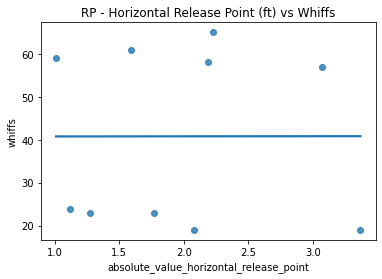

In [47]:
sns.regplot(x="absolute_value_horizontal_release_point", y="whiffs", ci=None, data = whiffs_df).set(title = 'RP - Horizontal Release Point (ft) vs Whiffs')

As you can see above, the 5 pitchers with the most whiffs, and 5 pitchers with the least amount of whiffs, varied in terms of their horizontal release point, indicating that one's horizontal release point does not necessarily impact one's ability to throw whiffs. 